<a href="https://colab.research.google.com/github/bbybsod/Algorithm-ant-colony-optimitazion/blob/main/jarak_pengangkutan_ACO_algorthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy

# Initialization parameter Ant Colony optimitazion

In [ ]:
alpha = 1
beta = 1
rho = 0.05
Q = 1
iteration = 100
pheromone_init = 0.1
m = 6

# data Nama Lokasi

In [ ]:
locations = [
    "TPA", "Jl. Marelan Raya", "Jl. Baut", "Jl. Pasar 1 Tengah",
    "Komplek Suzuya Plaza", "Komplek Marelan 88", "Komplek Deli Indah",
    "Komplek Maryland", "Komplek Sejati", "Rs Esmun"
]

# Matrix distance

In [ ]:
d = np.array([
    [0, 2.0, 5.9, 5.1, 6.1, 2.8, 4.0, 6.0, 5.3, 4.8],
    [2.0, 0, 1.6, 2.1, 0.35, 3.9, 2.0, 0.65, 0.9, 0.65],
    [5.9, 1.6, 0, 1.8, 1.4, 4.4, 4.2, 1.5, 1.5, 1.1],
    [5.1, 2.1, 1.8, 0, 2.5, 3.6, 2.8, 2.8, 2.0, 1.5],
    [6.1, 0.35, 1.4, 2.5, 0, 4.6, 4.4, 0.7, 0.75, 1.3],
    [2.8, 3.9, 4.4, 3.6, 4.6, 0, 1.7, 4.6, 3.8, 3.3],
    [4.0, 2.0, 4.2, 2.8, 4.4, 1.7, 0, 4.4, 3.7, 3.2],
    [6.0, 0.65, 1.5, 2.8, 0.7, 4.6, 4.4, 0, 0.7, 1.3],
    [5.3, 0.9, 1.5, 2.0, 0.75, 3.8, 3.7, 0.7, 0, 0.6],
    [4.8, 0.65, 1.1, 1.5, 1.3, 3.3, 3.2, 1.3, 0.6, 0]
])

n = len(d)

# Fungsi-fungsi utama ant colony optimitazion

In [ ]:
def findroute(rute, antnumber, temp_visibility, pheromone):
    i = copy.copy(antnumber)
    p_feature = np.power(pheromone, alpha)
    v_feature = np.power(temp_visibility, beta)
    combine = np.multiply(p_feature, v_feature)
    for j in range(n - 1):
        cur = int(rute[i, j])
        combine[:, cur] = 0
        prob = combine[cur, :]
        total = np.sum(prob)
        cum_prob = np.cumsum(prob / total)
        r = np.random.random()
        city = np.where(cum_prob > r)[0][0]
        rute[i, j + 1] = city
    return rute

def findrouteallant(rute, pheromone, visibility):
    temp_visibility = np.array(visibility)
    for i in range(m):
        rute = findroute(rute, i, temp_visibility, pheromone)
    return rute

def totaldistancetour(tour):
    jarak = 0
    tour = tour.astype(int)
    for i in range(len(tour) - 1):
        jarak += d[tour[i]][tour[i + 1]]
    jarak += d[tour[-1]][tour[0]]
    return jarak

def evaluate(ants):
    ants = ants.tolist()
    evaluations = [totaldistancetour(np.array(tour)) for tour in ants]
    return evaluations

def updatepheromone(pheromone, rute, evaluasi):
    for i in range(m):
        for j in range(n - 1):
            dt = Q / evaluasi[i]
            pheromone[int(rute[i, j]), int(rute[i, j + 1])] += dt
    return pheromone

def performancerecord(evaluasi, rute, bestperformance, solutionarray, performancearray, bestperformancearray):
    currentperformance = min(evaluasi)
    currentsolution = rute[np.argmin(evaluasi)]
    if currentperformance < bestperformance:
        bestperformance = copy.copy(currentperformance)
    solutionarray.append(currentsolution)
    performancearray.append(currentperformance)
    bestperformancearray.append(bestperformance)
    return solutionarray, performancearray, bestperformancearray, bestperformance

# Proses utama ACO

In [ ]:
visibility = 1 / (d + np.eye(n))
np.fill_diagonal(visibility, 0)
pheromone = pheromone_init * np.ones((n, n))
rute = np.zeros((m, n))
bestperformance = np.inf
solutionarray = []
performancearray = []
bestperformancearray = []

for ite in range(iteration):
    rute = findrouteallant(rute, pheromone, visibility)
    evaluasi = evaluate(rute)
    pheromone = updatepheromone(pheromone, rute, evaluasi)
    solutionarray, performancearray, bestperformancearray, bestperformance = performancerecord(
        evaluasi, rute, bestperformance, solutionarray, performancearray, bestperformancearray)

# output hasil

In [ ]:
print("Rute terbaik:")
best_route = solutionarray[-1].astype(int)
print(" -> ".join([locations[i] for i in best_route] + [locations[best_route[0]]]))
print("Jarak tempuh minimum:", bestperformance)

Rute terbaik:
TPA -> Komplek Marelan 88 -> Komplek Deli Indah -> Jl. Pasar 1 Tengah -> Jl. Baut -> Rs Esmun -> Komplek Suzuya Plaza -> Komplek Sejati -> Komplek Maryland -> Jl. Marelan Raya -> TPA
Jarak tempuh minimum: 14.549999999999997


# Plot hasil performa menggunakan matplotplib

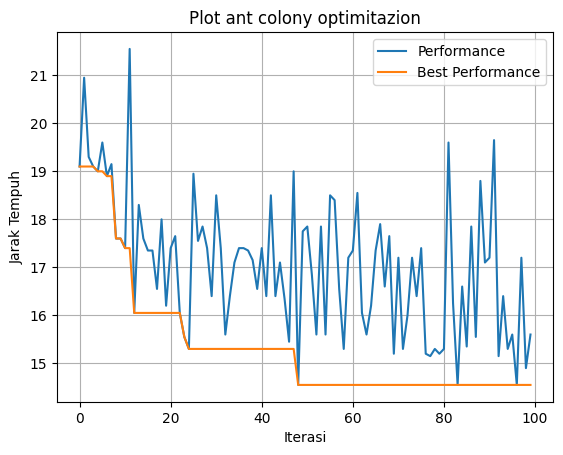

In [ ]:
plt.plot(performancearray, label="Performance")
plt.plot(bestperformancearray, label="Best Performance")
plt.title("Plot ant colony optimitazion")
plt.xlabel("Iterasi")
plt.ylabel("Jarak Tempuh")
plt.legend()
plt.grid()
plt.show()